# ADS 509 Module 3: Group Comparison 

The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

This assignment asks you to analyze the lyrics for the two artists you selected in Module 1 and the Twitter descriptions pulled for Robyn and Cher. If the results from that pull were not to your liking, you are welcome to use the zipped data from the “Assignment Materials” section. Specifically, you are asked to do the following: 

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set. 
* Calculate descriptive statistics on the two sets of lyrics and compare the results. 
* For each of the four corpora, find the words that are unique to that corpus. 
* Build word clouds for all four corpora. 

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization). 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [2]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 kB 3.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


In [19]:
# Use this space for any additional import statements you need
import os

In [4]:
# Place any addtional functions or constants you need here. 

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
sw = stopwords.words("english")

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# It's handy to have a full set of emojis
all_language_emojis = set()

for country in emoji.EMOJI_DATA : 
    for em in emoji.EMOJI_DATA[country] : 
        all_language_emojis.add(em)

In [6]:
sw[:5]

['i', 'me', 'my', 'myself', 'we']

In [46]:
# and now our functions
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of 
    """

    # Place your Module 2 solution here

    # length of num tokens list
    num_tokens = len(tokens)

    # length of unique tokens in list
    num_unique_tokens = len(set(tokens))

    # unique tokens divided by total tokens to see diversity
    # update to empty tokens list to not divide by zero
    if num_tokens > 0:
        lexical_diversity = num_unique_tokens / num_tokens
    else:
        lexical_diversity = 0  # Default value when no tokens are present

    # get sum of characters
    sum = 0
    for word in tokens:
        for char in word:
            sum += 1

    num_characters = sum
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    
def contains_emoji(s):
    
    s = str(s)
    emojis = [ch for ch in s if emoji.is_emoji(ch)]

    return(len(emojis) > 0)


def remove_stop(tokens) :
    # modify this function to remove stopwords

    # empty list to hold non stopwords
    filtered_tokens = []

    # for each token, if it is not a stopword, add it to the final list
    for token in tokens:
        if token.lower() not in sw:
            filtered_tokens.append(token)

    return(filtered_tokens)
 
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    
    # modify this function to return tokens

    # split on whitespace
    tokens = text.split()

    return(tokens)

def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)

## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [11]:
# Feel fre to use the below cells as an example or read in the data in a way you prefer

data_location = "/Users/roger.qiu/Documents/other/code/USD/11. Applied Text Mining/ads-509/module_3/ads-tm-group-comp/M1 Results/" # change to your location if it is not in the same directory as your notebook
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

artist_files = {'cher':'cher_followers_data.txt',
                'robyn':'robynkonichiwa_followers_data.txt'}


In [12]:
twitter_data = pd.read_csv(data_location + twitter_folder + artist_files['cher'],
                           sep="\t",
                           quoting=3)

twitter_data['artist'] = "cher"

In [14]:
# check data 
twitter_data.head()

,screen_name,name,id,location,followers_count,friends_count,description,artist
0,hsmcnp,Country Girl,35152213,NaN,1302,1014,NaN,cher
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher
2,anju79990584,anju,1496463006451974150,NaN,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher
3,gallionjenna,J,3366479914,NaN,752,556,csu,cher
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,cher


In [15]:
# check count and fields
twitter_data.shape

(3994803, 8)

In [16]:
twitter_data_2 = pd.read_csv(data_location + twitter_folder + artist_files['robyn'],
                             sep="\t",
                             quoting=3)
twitter_data_2['artist'] = "robyn"

twitter_data = pd.concat([
    twitter_data,twitter_data_2])
    
del(twitter_data_2)

In [18]:
# check again with robyn
twitter_data.head()

,screen_name,name,id,location,followers_count,friends_count,description,artist
0,hsmcnp,Country Girl,35152213,NaN,1302,1014,NaN,cher
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher
2,anju79990584,anju,1496463006451974150,NaN,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher
3,gallionjenna,J,3366479914,NaN,752,556,csu,cher
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,cher


In [17]:
# check total counts again
twitter_data.shape

(4353175, 8)

In [20]:
# read in the lyrics here
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/roger.qiu/Documents/other/code/USD/11. Applied Text Mining/ads-509/module_3/ads-tm-group-comp


In [21]:
# set subdirectory path
directory_path = "M1 Results/lyrics/cher/"

# create empty list to store filenames
filenames = []

# for every filename in the directory path, add it to filesnames
for filename in os.listdir(directory_path):
    filenames.append(filename)

filenames[:5]

['cher_comeandstaywithme.txt',
 'cher_pirate.txt',
 'cher_stars.txt',
 'cher_thesedays.txt',
 'cher_lovesohigh.txt']

In [22]:
# create list for full filepaths
file_paths = []

# for each filepath plus file name, append to filepaths
for filename in filenames:
    file_path = os.path.join(directory_path, filename)
    file_paths.append(file_path)

file_paths[:5]

['M1 Results/lyrics/cher/cher_comeandstaywithme.txt',
 'M1 Results/lyrics/cher/cher_pirate.txt',
 'M1 Results/lyrics/cher/cher_stars.txt',
 'M1 Results/lyrics/cher/cher_thesedays.txt',
 'M1 Results/lyrics/cher/cher_lovesohigh.txt']

In [23]:
# empty data list to store all the text data
data = []

# for each file path, open the text file, read it, strip trailing spaces and sppend to data as a list
for file_path in file_paths:  
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read().strip()
        data.append([filename, text])

data[:1]

[['cher_classified1a.txt',
  '"Come And Stay With Me"\n\n\n\nI\'ll send away all my false pride\nAnd I\'ll forsake all of my life\nYes I\'ll be as true as true can be\nIf you\'ll come and stay with me\n\nAll lovers of the past, I\'ll leave behind\nThey\'ll never be another on my mind\nI\'ll do all I can so you\'ll feel free\nIf you\'ll come and stay with me\n\nThe promise I made most faithfully\nI\'ll keep still if you decide to leave\nI\'ll try and see that you have all you need\nIf you\'ll come and stay with me\n\nYes I\'ll be as true as true can be\nIf you\'ll come and stay with me\n\nLive a life no others have ever known\nBut I know you think that I\'m hardly grown\nOh thank God at last and finally\nI can see you\'re gonna stay with me\nI can see you\'re gonna stay with me']]

In [24]:
# create a dataframe based on the data lists
df_cher = pd.DataFrame(data, columns=['Filename', 'Text'])

df_cher.head()

,Filename,Text
0,cher_classified1a.txt,"""Come And Stay With Me""\n\n\n\nI'll send away ..."
1,cher_classified1a.txt,"""Pirate""\n\n\n\nHe'll sail on with the summer ..."
2,cher_classified1a.txt,"""Stars""\n\n\n\nI was never one for saying what..."
3,cher_classified1a.txt,"""These Days""\n\n\n\nWell I've been out walking..."
4,cher_classified1a.txt,"""Love So High""\n\n\n\nEvery morning I would wa..."


In [25]:
# check the shape
df_cher.shape

(316, 2)

In [26]:
# now do the same for robyn

directory_path = "M1 Results/lyrics/robyn/"

filenames = []

for filename in os.listdir(directory_path):
    filenames.append(filename)

file_paths = []

for filename in filenames:
    file_path = os.path.join(directory_path, filename)
    file_paths.append(file_path)

data = []

for file_path in file_paths:    
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read().strip()
        data.append([filename, text])

df_robyn = pd.DataFrame(data, columns=['Filename', 'Text'])
df_robyn.head()

,Filename,Text
0,robyn_play.txt,"""Include Me Out""\n\n\n\nIt is really very simp..."
1,robyn_play.txt,"""Electric""\n\n\n\nElectric...\n\nIt's electric..."
2,robyn_play.txt,"""Beach 2K20""\n\n\n\n(So you wanna go out?\nHow..."
3,robyn_play.txt,"""Love Kills""\n\n\n\nIf you're looking for love..."
4,robyn_play.txt,"""Time Machine""\n\n\n\nHey, what did I do?\nCan..."


In [27]:
df_robyn.shape

(104, 2)

In [29]:
# union the two df's together so we have one complete df for both artists
lyrics_data = pd.concat([df_cher, df_robyn], ignore_index=True)
lyrics_data.shape

(420, 2)

## Tokenization and Normalization

In this next section, tokenize and normalize your data. We recommend the following cleaning. 

**Lyrics** 

* Remove song titles
* Casefold to lowercase
* Remove stopwords (optional)
* Remove punctuation
* Split on whitespace

Removal of stopwords is up to you. Your descriptive statistic comparison will be different if you include stopwords, though TF-IDF should still find interesting features for you. Note that we remove stopwords before removing punctuation because the stopword set includes punctuation.

**Twitter Descriptions** 

* Casefold to lowercase
* Remove stopwords
* Remove punctuation other than emojis or hashtags
* Split on whitespace

Removing stopwords seems sensible for the Twitter description data. Remember to leave in emojis and hashtags, since you analyze those. 

In [36]:
# apply the `pipeline` techniques from BTAP Ch 1 or 5

my_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]

lyrics_data["tokens"] = lyrics_data["Text"].apply(prepare,pipeline=my_pipeline)
lyrics_data["num_tokens"] = lyrics_data["tokens"].map(len) 

twitter_data["tokens"] = twitter_data["description"].apply(prepare,pipeline=my_pipeline)
twitter_data["num_tokens"] = twitter_data["tokens"].map(len) 


In [37]:
# check lyrics data again
lyrics_data.head()

,Filename,Text,tokens,num_tokens
0,cher_classified1a.txt,"""Come And Stay With Me""\n\n\n\nI'll send away ...","[come, stay, ill, send, away, false, pride, il...",78
1,cher_classified1a.txt,"""Pirate""\n\n\n\nHe'll sail on with the summer ...","[pirate, hell, sail, summer, wind, blows, day,...",144
2,cher_classified1a.txt,"""Stars""\n\n\n\nI was never one for saying what...","[stars, never, one, saying, really, feel, exce...",160
3,cher_classified1a.txt,"""These Days""\n\n\n\nWell I've been out walking...","[days, well, ive, walking, dont, much, talking...",82
4,cher_classified1a.txt,"""Love So High""\n\n\n\nEvery morning I would wa...","[love, high, every, morning, would, wake, id, ...",89


In [38]:
# check twitter data again
twitter_data.head()

,screen_name,name,id,location,followers_count,friends_count,description,artist,tokens,num_tokens
0,hsmcnp,Country Girl,35152213,NaN,1302,1014,NaN,cher,[nan],1
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher,"[𝙿𝚛𝚘𝚞𝚍, 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛, 𝚘𝚏, 𝚖𝚎𝚜𝚜𝚢, 𝚋𝚞𝚗𝚜, 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜]",6
2,anju79990584,anju,1496463006451974150,NaN,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher,"[163㎝／愛かっぷ💜26歳🍒, 工〇好きな女の子💓, フォローしてくれたらdmします🧡]",3
3,gallionjenna,J,3366479914,NaN,752,556,csu,cher,[csu],1
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,cher,"[writer, washinformer, spelmancollege, alumna,...",17


In [39]:
twitter_data['has_emoji'] = twitter_data["description"].apply(contains_emoji)

In [41]:
twitter_data.head()

,screen_name,name,id,location,followers_count,friends_count,description,artist,tokens,num_tokens,has_emoji
0,hsmcnp,Country Girl,35152213,NaN,1302,1014,NaN,cher,[nan],1,False
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher,"[𝙿𝚛𝚘𝚞𝚍, 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛, 𝚘𝚏, 𝚖𝚎𝚜𝚜𝚢, 𝚋𝚞𝚗𝚜, 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜]",6,False
2,anju79990584,anju,1496463006451974150,NaN,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher,"[163㎝／愛かっぷ💜26歳🍒, 工〇好きな女の子💓, フォローしてくれたらdmします🧡]",3,True
3,gallionjenna,J,3366479914,NaN,752,556,csu,cher,[csu],1,False
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,cher,"[writer, washinformer, spelmancollege, alumna,...",17,False


Let's take a quick look at some descriptions with emojis.

In [42]:
twitter_data[twitter_data.has_emoji].sample(10)[["artist","description","tokens"]]

,artist,description,tokens
1496858,cher,Too gay to function🏳️‍🌈💁🏻‍♂️. he/him pronouns....,"[gay, function🏳️‍🌈💁🏻‍♂️, hehim, pronouns, soci..."
1255219,cher,"Hi i am fun,playful,super likable love animals...","[hi, funplayfulsuper, likable, love, animals, ..."
165352,cher,Living the fantasy all day everyday!! Come alo...,"[living, fantasy, day, everyday, come, along, ..."
7960,robyn,Un Film de Almodóvar 🏳️‍🌈,"[un, film, de, almodóvar, 🏳️‍🌈]"
2621916,cher,Rock my world into the sunlight ☠ \m/,"[rock, world, sunlight, ☠]"
264854,cher,Proud N. Irish in LDN running 16 pubs in the W...,"[proud, n, irish, ldn, running, 16, pubs, west..."
868621,cher,I find only freedom in the realms of eccentric...,"[find, freedom, realms, eccentricity, david, b..."
3700649,cher,😴,[😴]
1181246,cher,promoting all the Bèlatis from Haiti 🇭🇹🇭🇹🇭🇹🇭🇹🚀...,"[promoting, bèlatis, haiti, 🇭🇹🇭🇹🇭🇹🇭🇹🚀🇭🇹🇭🇹😍😍]"
2403318,cher,"Sweet as Sugar , Cold as Ice Hurt me once I'll...","[sweet, sugar, cold, ice, hurt, ill, break, tw..."


With the data processed, we can now start work on the assignment questions. 

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

A: One possible area is that, the emotes are often chained together without spaces in between. So after tokenzation, multiple emojis will appear as one token if there are no spaces in between them. So an improvement that could make the tokens more accurate is to break every emoji apart as its own token, regardless of spacing around it.

## Calculate descriptive statistics on the two sets of lyrics and compare the results. 


In [44]:
# your code here

# apply the the descriptive_stats function to the cleaned tokens of each records in df_lyrics to create 4 new fields
lyrics_data[['num_tokens', 'num_unique_tokens', 'lexical_diversity', 'num_characters']] = lyrics_data['tokens'].apply(lambda tokens: pd.Series(descriptive_stats(tokens, verbose=False)))

lyrics_data[:1]

,Filename,Text,tokens,num_tokens,num_unique_tokens,lexical_diversity,num_characters
0,cher_classified1a.txt,"""Come And Stay With Me""\n\n\n\nI'll send away ...","[come, stay, ill, send, away, false, pride, il...",78.0,47.0,0.602564,342.0


In [51]:
# create artists field based on if filename starts with cher or robyn
lyrics_data['Artist'] = lyrics_data['Filename'].apply(lambda x: 'cher' if x.startswith('cher_') else ('robyn'))
lyrics_data[:1]

,Filename,Text,tokens,num_tokens,num_unique_tokens,lexical_diversity,num_characters,Artist
0,cher_classified1a.txt,"""Come And Stay With Me""\n\n\n\nI'll send away ...","[come, stay, ill, send, away, false, pride, il...",78.0,47.0,0.602564,342.0,cher


In [53]:
# group by the artists and then get the mean of the four new fields
average_stats = lyrics_data.groupby('Artist').agg({
    'num_tokens': 'mean',
    'num_unique_tokens': 'mean',
    'lexical_diversity': 'mean',
    'num_characters': 'mean'
})

average_stats

,num_tokens,num_unique_tokens,lexical_diversity,num_characters
Artist,,,,
cher,113.658228,57.439873,0.525663,546.310127
robyn,146.413462,63.288462,0.472167,709.490385


Q: what observations do you make about these data? 

A: So based on the aggregation of the summary stats, we can see that on average, robyns songs have more tokens, have more unique tokens, has LESS lexical diversity and overall, more characters than chers songs.

## Find tokens uniquely related to a corpus

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents (if we view each data source as a single document) or too many (if we view each description as a separate document). In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis. 

To avoid these problems, we will create a custom statistic to identify words that are uniquely related to each corpus. The idea is to find words that occur often in one corpus and infrequently in the other(s). Since corpora can be of different lengths, we will focus on the _concentration_ of tokens within a corpus. "Concentration" is simply the count of the token divided by the total corpus length. For instance, if a corpus had length 100,000 and a word appeared 1,000 times, then the concentration would be $\frac{1000}{100000} = 0.01$. If the same token had a concentration of $0.005$ in another corpus, then the concentration ratio would be $\frac{0.01}{0.005} = 2$. Very rare words can easily create infinite ratios, so you will also add a cutoff to your code so that a token must appear at least $n$ times for you to return it. 

An example of these calculations can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1P87fkyslJhqXFnfYezNYrDrXp_GS8gwSATsZymv-9ms). Please don't hesitate to ask questions if this is confusing. 

In this section find 10 tokens for each of your four corpora that meet the following criteria: 

1. The token appears at least `n` times in all corpora
1. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.

In [55]:
# your code here

# create seperate df for cher and robyn
cher_data = lyrics_data[lyrics_data['Artist'] == 'cher']
robyn_data = lyrics_data[lyrics_data['Artist'] == 'robyn']

cher_data[:1]

,Filename,Text,tokens,num_tokens,num_unique_tokens,lexical_diversity,num_characters,Artist
0,cher_classified1a.txt,"""Come And Stay With Me""\n\n\n\nI'll send away ...","[come, stay, ill, send, away, false, pride, il...",78.0,47.0,0.602564,342.0,cher


In [57]:
# explode each token into a row along with its count
cher_tokens = cher_data['tokens'].explode().value_counts()
robyn_tokens = robyn_data['tokens'].explode().value_counts()

cher_tokens

love         1004
im            513
know          486
dont          440
youre         333
             ... 
ruby            1
belle           1
ignored         1
bored           1
boodnight       1
Name: tokens, Length: 3703, dtype: int64

In [58]:
# get the total number of tokens for concentration calculations
cher_total = cher_tokens.sum()
robyn_total = robyn_tokens.sum()

cher_total

35916

In [59]:
# divide each token by total number of tokens to get concentrations of each token
cher_concentration = cher_tokens / cher_total
robyn_concentration = robyn_tokens / robyn_total

cher_concentration

love         0.027954
im           0.014283
know         0.013532
dont         0.012251
youre        0.009272
               ...   
ruby         0.000028
belle        0.000028
ignored      0.000028
bored        0.000028
boodnight    0.000028
Name: tokens, Length: 3703, dtype: float64

In [60]:
# filter on the tokens that appear 5 or more times
cher_filtered = cher_concentration[cher_tokens >= 5]
robyn_filtered = robyn_concentration[robyn_tokens >= 5]

cher_filtered

love        0.027954
im          0.014283
know        0.013532
dont        0.012251
youre       0.009272
              ...   
forsake     0.000139
landed      0.000139
folks       0.000139
daylight    0.000139
em          0.000139
Name: tokens, Length: 1088, dtype: float64

In [61]:
# only include tokens that appear for both artists
common_tokens = cher_filtered.index.intersection(robyn_filtered.index)
common_tokens

Index(['love', 'im', 'know', 'dont', 'youre', 'time', 'baby', 'see', 'oh',
       'one',
       ...
       'simple', 'makin', 'swear', 'crash', 'aside', 'spinning', 'low',
       'forgive', 'pull', 'em'],
      dtype='object', length=377)

In [62]:
# only keep the tokens in both dfs
cher_common = cher_filtered.loc[common_tokens]
robyn_common = robyn_filtered.loc[common_tokens]

cher_common

love        0.027954
im          0.014283
know        0.013532
dont        0.012251
youre       0.009272
              ...   
spinning    0.000139
low         0.000139
forgive     0.000139
pull        0.000139
em          0.000139
Name: tokens, Length: 377, dtype: float64

In [66]:
# combine concentrations of both artists common lyrics together into 1 df as ratios
ratios = pd.DataFrame({
    'Cher': cher_common,
    'Robyn': robyn_common
})

ratios

,Cher,Robyn
love,0.027954,0.018060
im,0.014283,0.019636
know,0.013532,0.020227
dont,0.012251,0.019768
youre,0.009272,0.011099
...,...,...
spinning,0.000139,0.000328
low,0.000139,0.000328
forgive,0.000139,0.001051
pull,0.000139,0.000657


In [67]:
# get the ratio by dividing one artists token concentration with another
ratios['Ratio'] = ratios['Cher'] / ratios['Robyn']

ratios

,Cher,Robyn,Ratio
love,0.027954,0.018060,1.547845
im,0.014283,0.019636,0.727399
know,0.013532,0.020227,0.668978
dont,0.012251,0.019768,0.619744
youre,0.009272,0.011099,0.835380
...,...,...,...
spinning,0.000139,0.000328,0.423961
low,0.000139,0.000328,0.423961
forgive,0.000139,0.001051,0.132488
pull,0.000139,0.000657,0.211981


In [68]:
# get top 10 tokens with highest ratios
top_tokens = ratios.nlargest(10, 'Ratio')

top_tokens

,Cher,Robyn,Ratio
walk,0.003285,0.000328,10.005491
find,0.003814,0.000394,9.680453
enough,0.003592,0.000460,7.813004
man,0.005931,0.000788,7.525316
without,0.002450,0.000328,7.461722
strong,0.002144,0.000328,6.529007
live,0.001893,0.000328,5.765876
believe,0.004037,0.000722,5.588583
tears,0.001587,0.000328,4.833161
name,0.001448,0.000328,4.409199


Q: What are some observations about the top tokens? Do you notice any interesting items on the list? 

A: Yes, it is definitely interesting that we can observe which 10 words appears the most in a certain artist and the least amount in another. It seems that Cher likes to use the words walk, find and enough, a lot more than Robyn does.

## Build word clouds for all four corpora. 

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found [here](https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb). If you haven't already, you should absolutely clone the repository that accompanies the book. 


In [69]:
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [74]:
word_frequencies = count_words(cher_data, column='tokens')
word_frequencies

,freq
token,
love,1004
im,513
know,486
dont,440
youre,333
...,...
madly,2
split,2
salvation,2


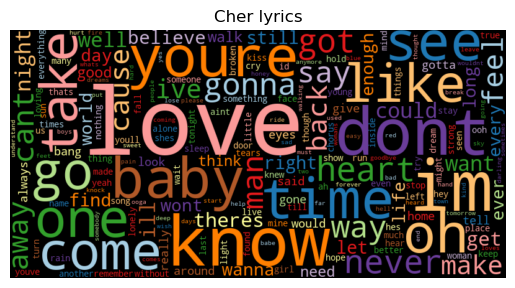

In [75]:
wordcloud(word_freq=word_frequencies['freq'], title='Cher lyrics')

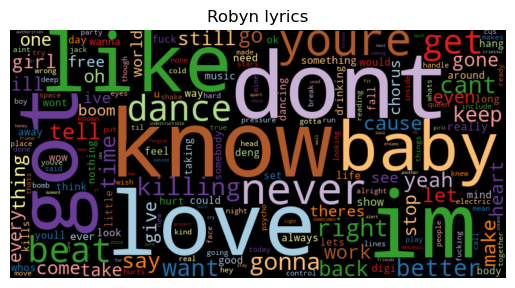

In [77]:
word_frequencies = count_words(robyn_data, column='tokens')
wordcloud(word_freq=word_frequencies['freq'], title='Robyn lyrics')

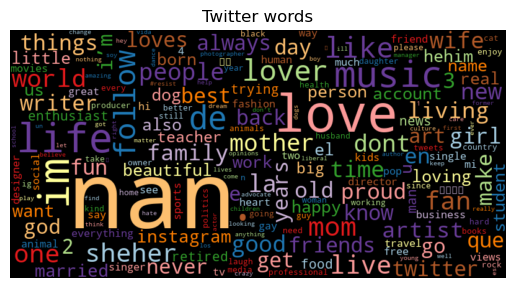

In [78]:
word_frequencies = count_words(twitter_data, column='tokens')
wordcloud(word_freq=word_frequencies['freq'], title='Twitter words')

Q: What observations do you have about these (relatively straightforward) wordclouds? 

A: Both artists love to use the word "love" in their songs. Aside from that, "know" and "like" also seem to be very popular words. The same seems to apply for tweets, along with terms such as "life" and "music".